# FEATURE ANALYSIS: IN-DEPTH ANALYSIS OF RELATIONSHIPS BETWEEN VARIABLES, MODEL DEVELOPMENT AND EVALUATION

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("tracks_df.csv")
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [2]:
df.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,popularity,explicit,available_markets,tempo,loudness,duration_min
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,0.638004,0.658206,5.388961,0.513636,0.097843,0.225179,0.054414,0.181375,0.524009,0.611539,0.219481,0.903867,3.287013,3.801948,3.880519
std,0.156735,0.195864,3.532271,0.499976,0.094124,0.259654,0.186747,0.140928,0.220662,0.179255,0.414029,0.266562,1.854545,1.753229,1.187441
min,0.159000,0.047200,0.000000,0.000000,0.023200,0.000003,0.000000,0.021500,0.039800,0.010000,0.000000,0.012658,0.000000,0.000000,1.000000
25%,0.531000,0.534000,2.000000,0.000000,0.038800,0.028000,0.000000,0.094075,0.354000,0.510000,0.000000,0.987342,1.000000,2.000000,3.000000
50%,0.655000,0.680000,6.000000,1.000000,0.056850,0.110000,0.000003,0.124500,0.526500,0.650000,0.000000,1.000000,3.000000,4.000000,4.000000
75%,0.755250,0.809000,9.000000,1.000000,0.115000,0.345250,0.000671,0.220000,0.689250,0.740000,0.000000,1.000000,5.000000,5.000000,4.000000
max,0.970000,0.990000,11.000000,1.000000,0.618000,0.978000,0.967000,0.943000,0.980000,1.000000,1.000000,1.000000,6.000000,6.000000,21.000000


Unordered Categorical Values: "key", "time_signature", "mode", "explicit"

Ordered Categorical Values: "tempo", "loudness", "duration_min"

Numerical Values: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "available_markets", "popularity"

Audio-Specific Features: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "mode", "key", "time_signature",
    "tempo", "loudness", "duration_min"

Success Metrics: "popularity", "available_markets"

Unique Features: 'id', 'name', 'release_date', 'artists'

# Q1: IS POPULARITY CORRELATED TO THE COUNT OF AVAILABLE MARKETS?

In [3]:
df[["available_markets", "popularity"]].corr()

,available_markets,popularity
available_markets,1.000000,0.007919
popularity,0.007919,1.000000


Result: No correlation between available markets and popularity maybe because all songs are available in such markets no matter they are popular.

# Q2: WHICH VARIABLES ARE STATISTICALLY THE MOST IMPORTANT FOR POPULARITY?

                          0
 0.033152      danceability
 0.026849            energy
-0.095221       speechiness
 0.035903              mode
-0.096868      acousticness
-0.221283  instrumentalness
-0.045171          liveness
-0.045310           valence
 0.084852          explicit
-0.003917             tempo
-0.001144          loudness
-0.020027      duration_min


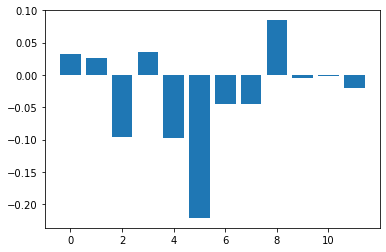

In [4]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "mode", "acousticness", "instrumentalness", "liveness", "valence", "explicit", "tempo", "loudness", "duration_min"]]
y = df["popularity"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: Popularity is not dependent upon any of these features.

# Q3: WHICH VARIABLES ARE PROBABLY CORRELATED?

In [5]:
corr_matrix = pd.DataFrame(df.corr().fillna(0))
corr_pos = corr_matrix[corr_matrix > 0.3].notnull()
corr_neg = corr_matrix[corr_matrix < -0.3].notnull()
columns = indexes = corr_pos.columns
for row in range(len(indexes)):
    for col in range(len(columns)):
        if(row <= col):
            pass
        elif(corr_pos.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")
        elif(corr_neg.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")

acousticness  <->  energy ( -0.6587574759907764 )
valence  <->  danceability ( 0.31538209429406416 )
valence  <->  energy ( 0.3599666093079816 )
explicit  <->  danceability ( 0.30824625158204644 )
explicit  <->  speechiness ( 0.4294812659442026 )
loudness  <->  energy ( 0.4062474527074292 )


=> Energy of the song is dependent on loudness and valence of the song, and most importantly, inversely proportional on acousticness. 

=> Whether a song is explicit is correlated to danceability, popularity and speechiness. In Speechiness <-> Explicit relationship, there is nothing to examine, because it is a no-brainer to think that speechiness is the necessary condition to have an explicit song. Popularity and danceability seem to be suitable for further analysis.

=> Valence is correlated to not also energy but also danceability, which makes sense.

# Q4: MAY MODE AND KEY HAVE RELATIONSHIP WITH OTHER AUDIO FEATURES ?  

Key: The note that the song is based on (e.g. C, D#, G)

Mode: Whether the key is followed  by a minor or a major chord progression

Key & Mode: 12 * 2 = 24 possible combinations

Key: [0-11] => [C-B] / Mode: [0, 1] => [Minor, Major]

In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [7]:
df_group = df[["energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "mode", "key"]].groupby(["mode", "key"]).mean()
df_group.describe()

,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.657463,0.095580,0.232223,0.052319,0.181688,0.519707
std,0.035781,0.024130,0.056527,0.027585,0.015990,0.043934
min,0.591148,0.056467,0.140206,0.004228,0.151007,0.441535
25%,0.637225,0.076606,0.195119,0.031001,0.172413,0.497404
50%,0.655528,0.099249,0.218058,0.049090,0.180495,0.514202
75%,0.686886,0.117206,0.280132,0.071681,0.191959,0.553680
max,0.721295,0.131233,0.345085,0.108266,0.211445,0.593864


Result: The selection of any special key or mode does not play a key role on any feature.

                          0
-0.048652      danceability
 0.085771            energy
 0.288411       speechiness
-0.132866      acousticness
 0.081175  instrumentalness
 0.026634          liveness
 0.034563           valence


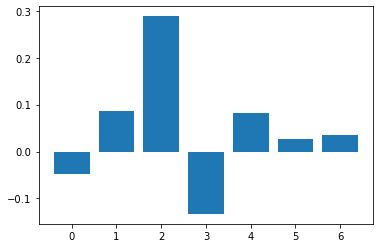

In [8]:
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
y = df["mode"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: The most important features related to the mode of the song are speechiness, acousticness and energy

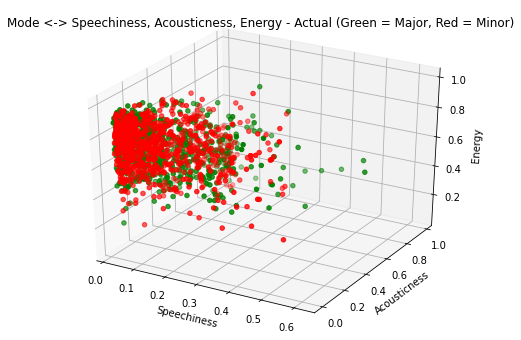

In [9]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["mode"] == 0]["speechiness"], df[df["mode"] == 0]["acousticness"], df[df["mode"] == 0]["energy"], color = "red")
ax.scatter(df[df["mode"] == 1]["speechiness"], df[df["mode"] == 1]["acousticness"], df[df["mode"] == 1]["energy"], color = "green")
ax.set_xlabel("Speechiness")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Energy")
ax.set_title("Mode <-> Speechiness, Acousticness, Energy - Actual (Green = Major, Red = Minor)")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn import metrics

treemodel = tree.DecisionTreeClassifier()
svmmodel = svm.SVC(kernel = "linear")
logmodel = LogisticRegression()

X = df[["energy", "speechiness", "acousticness"]] 
X_train, X_test, y_train, y_test = train_test_split(X, df["mode"], test_size = 0.2)

treemodel.fit(X_train, y_train)
svmmodel.fit(X_train, y_train)
logmodel.fit(X_train, y_train)

y_pred_svm = svmmodel.predict(X_test)
y_pred_tree = treemodel.predict(X_test)
y_pred_log = logmodel.predict(X_test)

print("treemodel: ", cross_val_score(treemodel, X, df["mode"], cv = 5).mean())
print("svmmodel: ", cross_val_score(svmmodel, X, df["mode"], cv = 5).mean())
print("logmodel: ", cross_val_score(logmodel, X, df["mode"], cv = 5).mean())

logfunction = [x[0] for x in logmodel.predict_proba(X)]

treemodel:  0.5012987012987014
svmmodel:  0.5324675324675324
logmodel:  0.5545454545454546


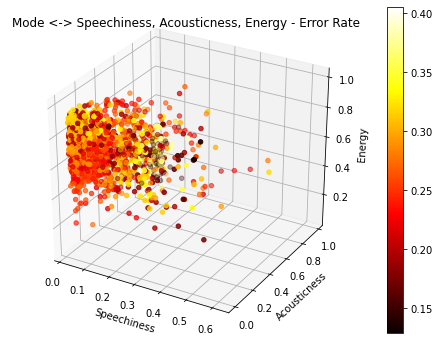

In [11]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["speechiness"], df["acousticness"], df["energy"], cmap = "hot", c = (logfunction - df["mode"])**2)
ax.set_xlabel("Speechiness")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Energy")
ax.set_title("Mode <-> Speechiness, Acousticness, Energy - Error Rate")
fig.colorbar(p)
plt.show()

Result: Despite the fact that the correlation coefficients between mode and other features are moderately significant, the features energy, speechiness and acousticness do not necessarily achieve information gain, as seen above. 

In [12]:
df_key = pd.get_dummies(df["key"], drop_first = True)
df_y = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
for y_val in df_y.columns:
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(df_key, df[y_val], test_size = 0.2)
    model.fit(X_train, y_train)
    print(y_val, cross_val_score(model, df_key, df[y_val], cv = 5).mean())

danceability -0.07349969966379519
energy -0.06063107744125453
speechiness -0.04086535963997624
acousticness -0.06202000572625754
instrumentalness -0.18503775960341226
liveness -0.017272682250216675
valence -0.032573783501722534


Result: The key of the song does not play any role on these features

# Q5: ENERGY <-> LOUDNESS, VALENCE, ACOUSTICNESS

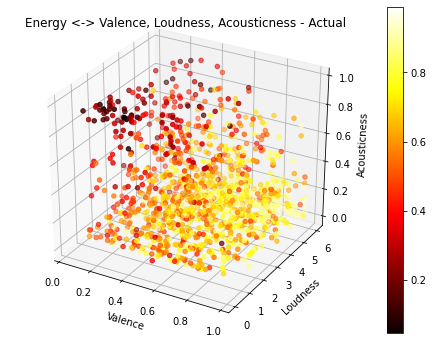

In [13]:
X = df[["valence", "loudness", "acousticness"]]
y = df["energy"]
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = df["energy"])
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Actual")
fig.colorbar(p)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X, y, cv = 5)
score.mean()

0.528695282747992

In [15]:
def energy_function(valence, loudness, acousticness):
    return model.coef_[0]*valence + model.coef_[1]*loudness - model.coef_[2]*acousticness + model.intercept_

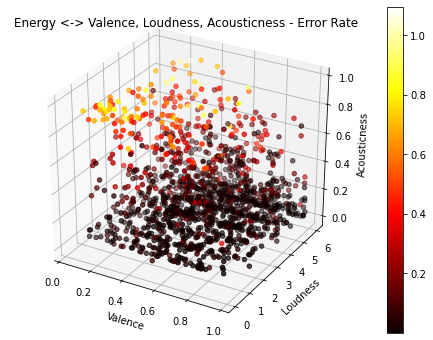

In [16]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = (energy_function(df["valence"], df["loudness"], df["acousticness"]) - df["energy"])**2)
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Error Rate")
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
fig.colorbar(p)
plt.show()

Result: Valence, loudness and acousticness are indeed good predictors of the energy of the song.

# Q6: EXPLICIT <-> POPULARITY, DANCEABILITY, SPEECHINESS

In [17]:
from scipy.stats import pearsonr
X = df[["popularity", "danceability", "speechiness"]]
y = df["explicit"]
c1, p1 = pearsonr(X["popularity"], y) # :0.30 with very low error
c2, p2 = pearsonr(X["danceability"], y) # :0.34 with very low error
c3, p3 = pearsonr(X["speechiness"], y) #0.38 with very low error

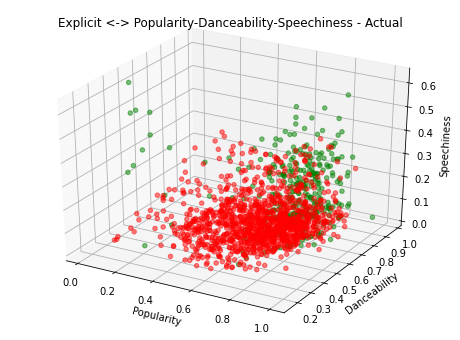

In [18]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["explicit"] == 0]["popularity"], df[df["explicit"] == 0]["danceability"], df[df["explicit"] == 0]["speechiness"], color = "red", alpha = 0.5)
ax.scatter(df[df["explicit"] == 1]["popularity"], df[df["explicit"] == 1]["danceability"], df[df["explicit"] == 1]["speechiness"], color = "green", alpha = 0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")
ax.set_title("Explicit <-> Popularity-Danceability-Speechiness - Actual")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
score = cross_val_score(logmodel, X, y, cv = 5)
print(score.mean())
logfunction = [x[0] for x in logmodel.predict_proba(X)]

0.8233766233766234


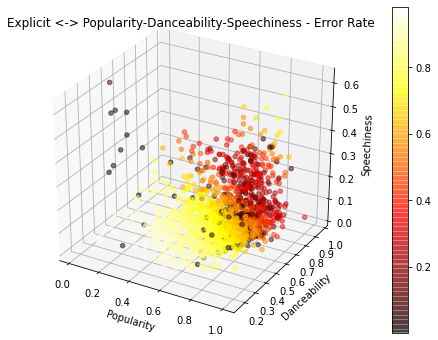

In [20]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["popularity"], df["danceability"], df["speechiness"], cmap = "hot", c = (logfunction - df["explicit"])**2, alpha = 0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")
ax.set_title("Explicit <-> Popularity-Danceability-Speechiness - Error Rate")
fig.colorbar(p)
plt.show()

Result: Based on speechiness, popularity and danceability of a song, we can predict with whether the content of a song is explicit or not, but it is very difficult to differentiate in songs with lower danceability.

# Q7: VALENCE <-> ENERGY, DANCEABILITY

In [21]:
X = df[["danceability", "energy"]]
y = df["valence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X, y, cv = 5)
c1, p1 = pearsonr(df["danceability"], df["valence"]) # :0.33 with very low error
c2, p2 = pearsonr(df["energy"], df["valence"]) # :0.38 with very low error
score.mean()

0.18708824941219246

In [22]:
def valence_function(danceability, energy):
    return model.coef_[0]*danceability + model.coef_[1]*energy - model.intercept_

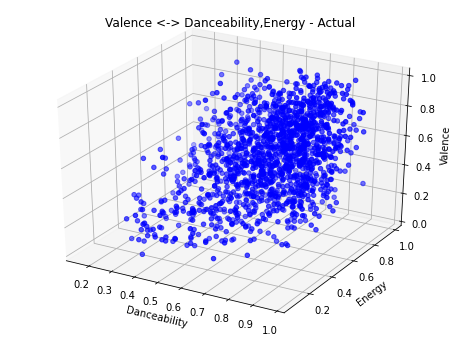

In [23]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["danceability"], df["energy"], df["valence"], color = "blue")
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Valence")
ax.set_title("Valence <-> Danceability,Energy - Actual")
plt.show()

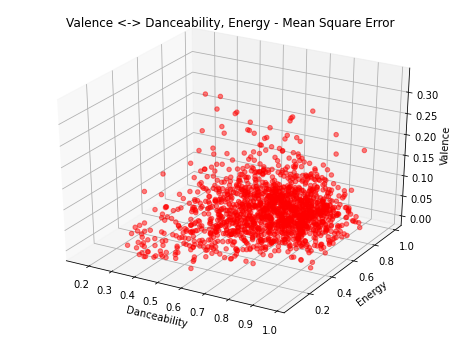

In [24]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["danceability"], df["energy"], (valence_function(df["danceability"], df["energy"]) - df["valence"])**2, color = "red", alpha = 0.5)
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Valence")
ax.set_title("Valence <-> Danceability, Energy - Mean Square Error")
plt.show()

Result: Despite the fact that valence of any song seem to be moderately correlated to energy and danceability, the overall score of model is too low and the error rate is respectively high as seen in the scatterplot.